# **REGRESSÃO LOGÍSTICA - COMPRA SUV**

Descrição de variáveis
*   User ID: Id de identificação do usuário
*   Gender: Sexo do usuário
*   Age: Idade do usuário
*   EstimatedSalary: Estimativa de salario do usuário
*   Purchased: Refere-se a possibilidade de compra de um SUV

Importando bibliotecas

In [536]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import chi2, chisquare
from statsmodels.graphics.regressionplots import abline_plot
import scipy.stats as stats  # Importando o módulo stats da biblioteca SciPy
import warnings

# Suprimir os warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [537]:
compra_suv = pd.read_csv('../Database/SUV_Network_Ads.csv',
                    sep=',', encoding='utf-8')

## **ANÁLISE INICIAL**

Verificando as variáveis carregadas no bando de dados

Base de dados tras a informação de pessoas comprar um SUV, baseado em sua idade e salário.

In [538]:
compra_suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [539]:
compra_suv.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [540]:
print(compra_suv.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [541]:
print(compra_suv.duplicated().sum())

0


In [542]:
print(compra_suv[['Age', 'EstimatedSalary']].describe())

              Age  EstimatedSalary
count  400.000000       400.000000
mean    37.655000     69742.500000
std     10.482877     34096.960282
min     18.000000     15000.000000
25%     29.750000     43000.000000
50%     37.000000     70000.000000
75%     46.000000     88000.000000
max     60.000000    150000.000000


In [543]:
compra_suv.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [544]:
compra_suv.shape

(400, 5)

<Axes: xlabel='Age', ylabel='Count'>

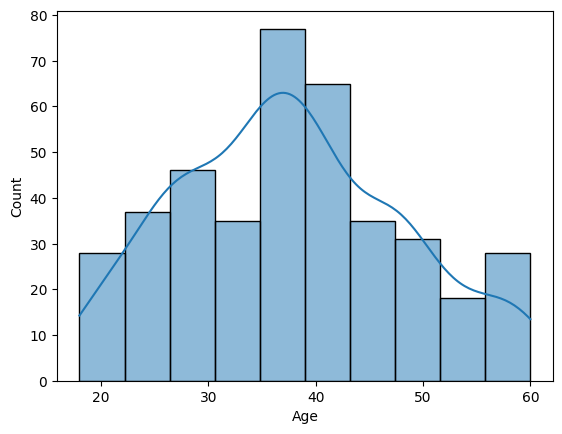

In [546]:
sns.histplot(compra_suv['Age'], kde=True)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

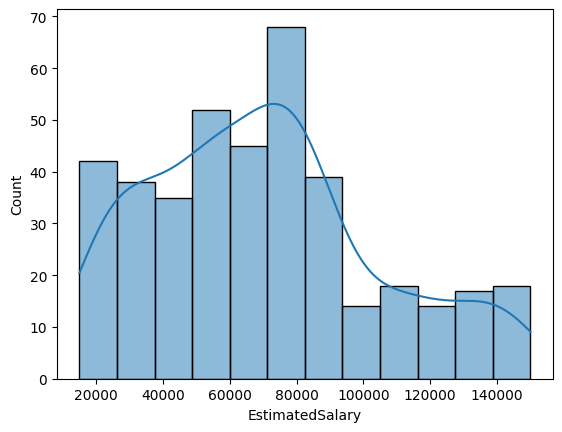

In [547]:
sns.histplot(compra_suv['EstimatedSalary'], kde=True)

<Axes: >

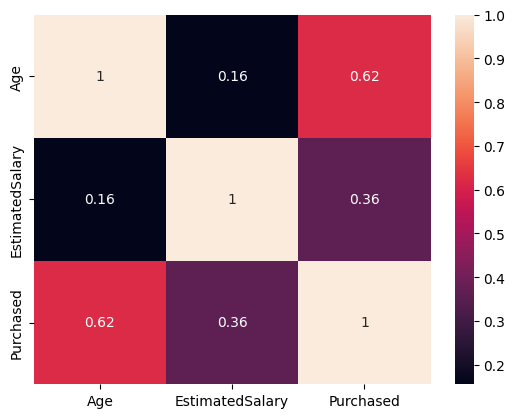

In [548]:
# Verificando a correlação entre as variáveis preditoras
sns.heatmap(compra_suv[['Age', 'EstimatedSalary', 'Purchased']].corr(), annot=True)

#Gerando o modelo a paritr da variavél Dummy criada

In [549]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo1 = smf.glm(formula='Purchased ~ Age + EstimatedSalary', 
                  data=compra_suv, family=sm.families.Binomial()).fit()
print(modelo1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.53
Date:                Tue, 03 Dec 2024   Deviance:                       277.05
Time:                        16:56:36   Pearson chi2:                     467.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4574
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4340      1.300     

### Deviance Residuals

**Hipótese Testada:**

-   $H_0$: O modelo ajusta bem os dados.

-   $H_a$: O modelo não ajusta bem os dados.

**Condição de Aceitação/Rejeição:**

-   A deviance total é comparada com uma distribuição qui-quadrado com $n - p$ graus de liberdade, onde $n$ é o número de observações e $p$ é o número de parâmetros no modelo.

-   **Aceitação de** $H_0$: Se o valor $p$ calculado a partir da deviance é maior que $\alpha$, aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.

-   **Rejeição de** $H_0$: Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.


In [550]:
# Teste de Deviance para os Resíduos
deviance_test_statistic = modelo1.deviance
deviance_df = modelo1.df_resid
deviance_p_value = 1 - stats.chi2.cdf(deviance_test_statistic, deviance_df)

print("Teste de Deviance para os Resíduos:")
print("Estatística de teste:", deviance_test_statistic)
print("Graus de liberdade:", deviance_df)
print("Valor p:", deviance_p_value)

Teste de Deviance para os Resíduos:
Estatística de teste: 277.05138239148346
Graus de liberdade: 397
Valor p: 0.9999990198090116


## Testes de adequação do modelo

### 1. Pearson Chi-Square Test

**Hipótese Testada:**

-   $H_0$: O modelo ajusta bem os dados.

-   $H_a$: O modelo não ajusta bem os dados.

**Condição de Aceitação/Rejeição:**

-   Calcula-se a estatística do teste qui-quadrado de Pearson, que segue uma distribuição qui-quadrado com $n - p$ graus de liberdade.

-   **Aceitação de** $H_0$: Se o valor $p$ é maior que $\alpha$, aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.

-   **Rejeição de** $H_0$: Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.


In [551]:
# Obtendo os resíduos de Pearson
residuos_pearson = modelo1.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic = np.sum(residuos_pearson**2)
pearson_df = len(residuos_pearson) - modelo1.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value = 1 - stats.chi2.cdf(pearson_test_statistic, pearson_df)


print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)



Teste de Pearson para os Resíduos:
Estatística de teste: 466.77640978752015
Graus de liberdade: 397
Valor p: 0.008947131735509428


In [552]:
modelo1.params

Intercept         -12.433988
Age                 0.233489
EstimatedSalary     0.000036
dtype: float64

Como conseguir tirar alguma informação , interpretação do modelo?

Iremos utilizar o que chamamos como razão de chance com Intervalo de confiança de 95%:
- exponencial do coeficiente.



In [553]:
razao = np.exp(modelo1.params[1])
print("Odds Ratio para 'Age':", razao)

Odds Ratio para 'Age': 1.2629994932016952


Idade (Age): O coeficiente de 0.233 significa que para cada aumento de 1 ano na idade do usuário, as chances de compra do SUV aumentam em 26.3%

In [554]:
razao = np.exp(modelo1.params[2])
print("Odds Ratio para 'EstimatedSalary':", razao)

Odds Ratio para 'EstimatedSalary': 1.0000359015826144


Salário Estimado (EstimatedSalary): O coeficiente de 0.000036 sugere que, para cada aumento de 1 unidade no salário estimado (por exemplo, 1 dólar), as chances de compra do SUV aumentam em 0.0036%. O Odds Ratio é:

### ROC Curve and AUC

Avalia a capacidade do modelo de discriminar entre as classes.

**Curva ROC**: Traça a taxa de verdadeiros positivos (sensibilidade) contra a taxa de falsos positivos (1 - especificidade) para vários limiares de classificação.

**AUC (Área Sob a Curva)**: Um valor próximo de 1 indica excelente discriminação, enquanto um valor próximo de 0.5 indica discriminação aleatória. -

**Avaliação do Modelo**: Um modelo com AUC maior é considerado melhor em discriminar entre as classes.

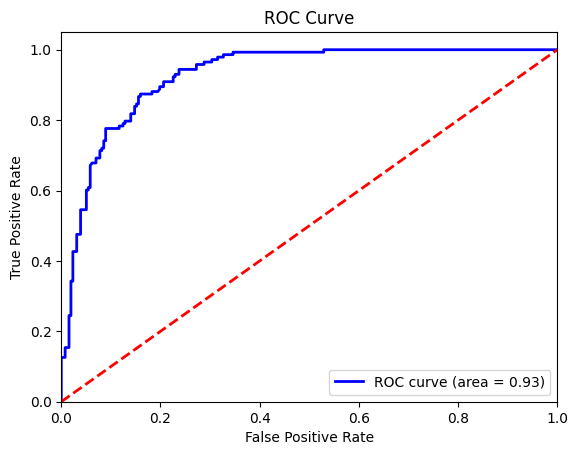

In [555]:
from sklearn.metrics import roc_curve, auc

y = compra_suv["Purchased"]

# ROC Curve
fpr, tpr, _ = roc_curve(y, modelo1.fittedvalues)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

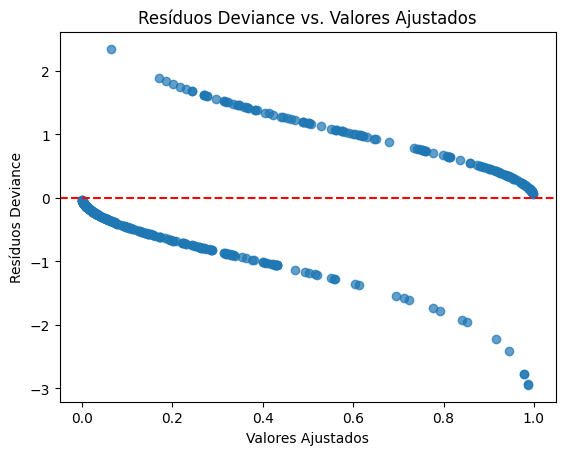

In [556]:
# Resíduos deviance
residuos_deviance = modelo1.resid_deviance

# Resíduos de Pearson
residuos_pearson = modelo1.resid_pearson

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Resíduos vs. valores ajustados
valores_ajustados = modelo1.fittedvalues
plt.scatter(valores_ajustados, residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos Deviance vs. Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos Deviance")
plt.show()

Text(0.5, 1.0, 'Resíduos de Deviance vs. Índice')

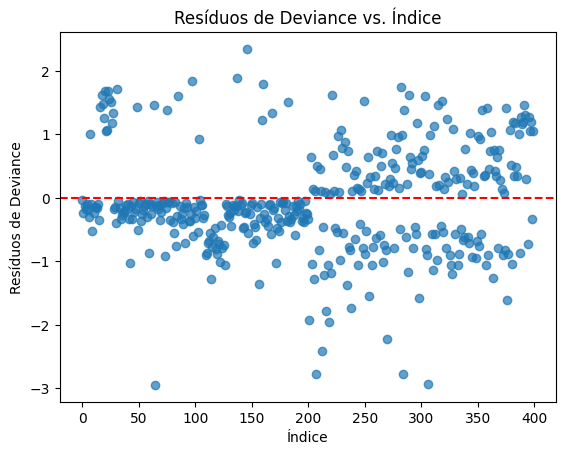

In [557]:
plt.scatter(range(len(residuos_deviance)), residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Resíduos de Deviance')
plt.title('Resíduos de Deviance vs. Índice')